In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

%matplotlib inline
sns.set()

In [33]:
mob_train = pd.read_csv('/content/sample_data/mobile_price_train.csv')
mob_test = pd.read_csv('/content/sample_data/mobile_price_test.csv')

In [34]:
mob_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [35]:
mob_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


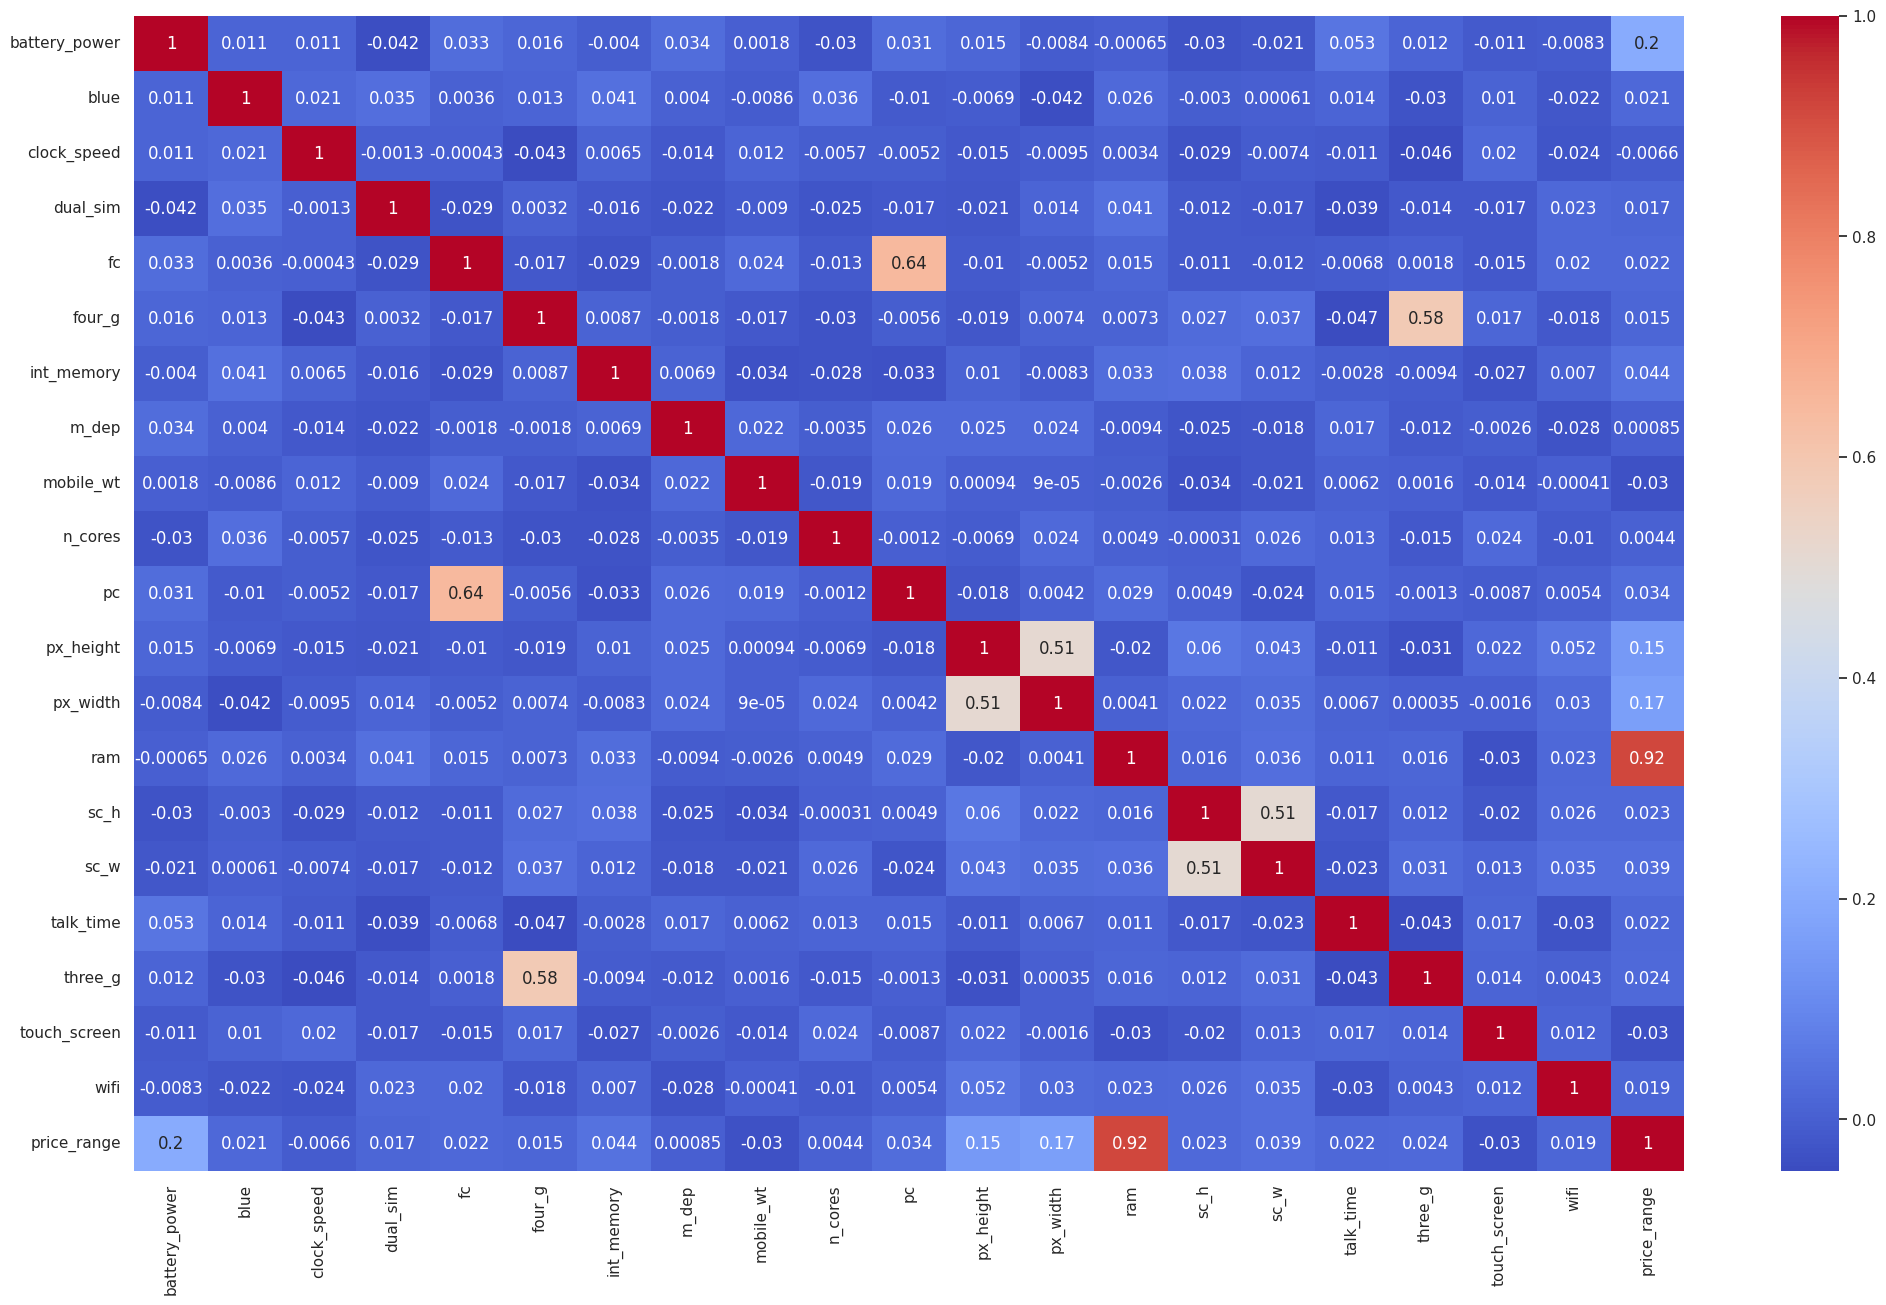

In [36]:
plt.figure(figsize=(25,15))

corr = mob_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [37]:

X = mob_train[['ram','battery_power','px_height','px_width']]
y = mob_train['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_val_poly)



In [38]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_val)

accuracy_log = accuracy_score(y_val, y_pred_log)
r1 = r2_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"Logistic Regression R-squared: {r1}")

print(classification_report(y_val, y_pred_log))
print(confusion_matrix(y_val,y_pred_log))

Logistic Regression Accuracy: 0.9725
Logistic Regression R-squared: 0.9793890733983202
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.96      0.95      0.95        92
           3       0.97      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

[[103   2   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   4 108]]
